# Resolução checkpoint 1 - sem. 2

## Módulos

In [ ]:
! sudo pip install unidecode

In [ ]:
# gerais
import numpy as np
import pandas as pd
import re
from unicodedata import normalize
import unidecode
import string
from spacy.lang.pt.stop_words import STOP_WORDS

In [ ]:
# texto
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from unicodedata import normalize
import unidecode
import string
from spacy.lang.pt.stop_words import STOP_WORDS

## Dados

In [ ]:
dados_atendimentos = pd.read_csv('dados_atendimentos.csv')

In [ ]:
dados_atendimentos.head()

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"""
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR"""
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO"""
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT..."


In [ ]:
dados_renda = pd.read_csv('dados_renda_municipios_2010.csv')

In [ ]:
dados_renda.head(10)

,state,city,RDPC
0,GO,Abadia de Goiás/GO,574.96
1,MG,Abadia dos Dourados/MG,596.18
2,GO,Abadiânia/GO,519.87
3,PA,Abaetetuba/PA,293.01
4,MG,Abaeté/MG,707.24
5,CE,Abaiara/CE,229.74
6,BA,Abaré/BA,220.16
7,PR,Abatiá/PR,535.86
8,BA,Abaíra/BA,290.53
9,SC,Abdon Batista/SC,485.35


## Funções

- Índice de Gini

Utilizar esta função para calcular o índice de gini para cada estado.

In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

## Questões

In [ ]:
# Substituir os valores na coluna 'usuarioOnline'
dados_atendimentos['usuarioOnline'] = dados_atendimentos['usuarioOnline'].replace({1: 'online', 0: 'offline'})
dados_atendimentos.head(2)

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro
0,1,CE,online,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
1,2,PE,offline,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"""


1 – Quantos atendimentos ocorrem online e offline? (coluna: usuarioOnline).

In [ ]:
atendimento_on_off = dados_atendimentos['usuarioOnline'].value_counts()
print("Tipos de avaliação e quantas ocorrências:")
print(atendimento_on_off)

Tipos de avaliação e quantas ocorrências:
offline    746
online     254
Name: usuarioOnline, dtype: int64


2 – Quantos tipos de avaliação e quantas ocorreram em cada tipo? (coluna: avaliacao).

In [ ]:
tipos_de_avaliacao = dados_atendimentos['avaliacao'].value_counts()
print("Tipos de avaliação e quantas ocorrências:")
print(tipos_de_avaliacao)

Tipos de avaliação e quantas ocorrências:
negativa       510
positiva       251
n/ avaliado    239
Name: avaliacao, dtype: int64


3 – Quantos tipos de erros e quantas vezes foram observados cada tipo? (coluna: codigo).

In [ ]:
tipos_de_erros = dados_atendimentos['codigo'].value_counts()
print("Tipos de erros e quantas ocorrências:")
print(tipos_de_erros)

Tipos de erros e quantas ocorrências:
550    533
500    467
Name: codigo, dtype: int64


In [ ]:
tipos_de_erros = dados_atendimentos[['codigo','erro']].value_counts()
print("Tipos de erros e quantas ocorrências:")
print(tipos_de_erros)

Tipos de erros e quantas ocorrências:
codigo  erro                                                                             
550     "NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. POR FAVOR TENTE NOVAMENTE MAIS TARDE"    198
        "NAO ENCONTROU DADOS PARA A SELECAO"                                                 138
500     "DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMOS TE ATENDER AGORA"                    131
550     "CPF -CNPJ CLIENTE NAO CADASTRADO"                                                    73
500     "OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENTE NOVAMENTE MAIS TARDE"                 72
        "INTERNAL SERVER ERROR"                                                               68
550     "ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"                                           64
500     "CLIENTE NAO CADASTRADO"                                                              63
550     "ERRO NA VALIDACAO DE DADOS BASICOS"                                                  60

4 – Obter as medidas descritivas em relação ao tempo de acesso. (coluna: tempoAcesso).


In [ ]:
meddesc_tempacesso = dados_atendimentos['tempoAcesso'].describe()
meddesc_tempacesso

count    1000.000000
mean      246.371000
std       112.761565
min         1.000000
25%       171.000000
50%       241.000000
75%       320.000000
max       629.000000
Name: tempoAcesso, dtype: float64

5 – Obter as medidas descritivas em relação ao tempo de acesso por atendimentos ocorrem
online e offline. (colunas: tempoAcesso e usuarioOnline).

In [ ]:
meddesc_on_off = dados_atendimentos.groupby('usuarioOnline')['tempoAcesso'].describe()
meddesc_on_off

,count,mean,std,min,25%,50%,75%,max
usuarioOnline,,,,,,,,
offline,746.0,244.640751,111.327823,1.0,169.25,240.0,316.00,563.0
online,254.0,251.452756,116.947658,7.0,173.00,245.5,335.75,629.0


6 – Obter as medidas descritivas em relação aos tipos de avaliação. (colunas: tempoAcesso e
avaliacao).


In [ ]:
meddesc_tipoavaliacao = dados_atendimentos.groupby('avaliacao')['tempoAcesso'].describe()
meddesc_tipoavaliacao

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,239.0,238.472803,115.949525,1.0,158.5,234.0,309.50,629.0
negativa,510.0,246.870588,113.674072,4.0,168.0,243.5,330.75,549.0
positiva,251.0,252.876494,107.700718,7.0,189.0,251.0,308.00,562.0


7 – Obter as medidas descritivas em relação aos tipos de erros. (colunas: tempoAcesso e codigo).

In [ ]:
meddesc_tipoerro = dados_atendimentos.groupby('codigo')['tempoAcesso'].describe()
meddesc_tipoerro

,count,mean,std,min,25%,50%,75%,max
codigo,,,,,,,,
500,467.0,245.173448,109.053762,4.0,173.0,237.0,319.5,629.0
550,533.0,247.420263,116.004844,1.0,169.0,246.0,321.0,563.0


8 – Montar uma nuvem de palavras para as mensagens de erro. (coluna: erro).

In [ ]:
texto_ajustado = dados_atendimentos['erro'].apply(lambda x: x.lower())
texto_ajustado = str(texto_ajustado)
texto_ajustado

'0      "no momento este serivco esta indisponivel. po...\n1            "erro na validacao de dados complementares"\n2                                "internal server error"\n3                     "cpf -cnpj cliente nao cadastrado"\n4      "ops! não foi possivel consultar o saldo. tent...\n                             ...                        \n995                   "cpf -cnpj cliente nao cadastrado"\n996    "ops! não foi possivel consultar o saldo. tent...\n997    "no momento este serivco esta indisponivel. po...\n998                             "cliente nao cadastrado"\n999                 "nao encontrou dados para a selecao"\nName: erro, Length: 1000, dtype: object'

In [ ]:
texto_limpo = re.sub(r"[^a-zA-Z\s]|(?:\b\w{1,2}\b)|\n", "", texto_ajustado)
texto_limpo

'       momento este serivco esta indisponivel             erro  validacao  dados complementares                                internal server error                     cpf cnpj cliente nao cadastrado      ops no foi possivel consultar  saldo tent                                                                        cpf cnpj cliente nao cadastrado    ops no foi possivel consultar  saldo tent     momento este serivco esta indisponivel                              cliente nao cadastrado                 nao encontrou dados para  selecaoName erro Length  dtype object'

In [ ]:
def remove_stops(texto_limpo):
    stops = set(STOP_WORDS)
    palavras_limpas = []
    for palavra in texto_limpo.split():
        if palavra.lower() not in stops:
            palavras_limpas.append(palavra)
    return ' '.join(palavras_limpas)


In [ ]:
texto_limpo_sem_stopwords = remove_stops(texto_limpo)
texto_limpo_sem_stopwords = texto_limpo_sem_stopwords.replace('serivco','servico')
texto_limpo_sem_stopwords = texto_limpo_sem_stopwords.replace('error', 'erro')
texto_limpo_sem_stopwords = texto_limpo_sem_stopwords.replace('Length', 'comprimento')
texto_limpo_sem_stopwords = texto_limpo_sem_stopwords.replace('server', 'servidor')
texto_limpo_sem_stopwords = texto_limpo_sem_stopwords.replace('object', 'objeto')
texto_limpo_sem_stopwords = texto_limpo_sem_stopwords.replace('internal', 'interno')
texto_limpo_sem_stopwords = re.sub(r'\b(?:ops|nao|tent|consultar|encontrou|selecaoName)\b', '', texto_limpo_sem_stopwords)
text_clean = texto_limpo_sem_stopwords

(-0.5, 399.5, 199.5, -0.5)

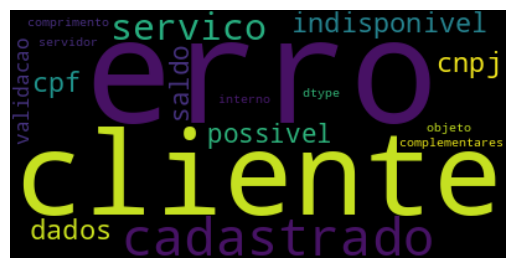

In [ ]:
wc = WordCloud()
wc.generate(text_clean)
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

9 – Montar nuvem de palavras sobre as mensagens de erro para os tipos de avaliação dos
clientes. (colunas: erro e avaliacao).

In [ ]:
#avaliação positiva
dados_positivos = dados_atendimentos[dados_atendimentos['avaliacao'] == 'positiva']
texto_ajustado_pos = dados_positivos['erro'].str.lower()
texto_ajustado_pos = texto_ajustado_pos.str.replace(r"[^a-zA-Z\s]", "")
texto_ajustado_pos = texto_ajustado_pos.str.replace(r"\b\w{1,3}\b", "")
texto_ajustado_pos =str(texto_ajustado_pos)

<ipython-input-30-94b865052cae>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  texto_ajustado_pos = texto_ajustado_pos.str.replace(r"[^a-zA-Z\s]", "")
<ipython-input-30-94b865052cae>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  texto_ajustado_pos = texto_ajustado_pos.str.replace(r"\b\w{1,3}\b", "")


In [ ]:
texto_limpo_pos = re.sub(r"[^a-zA-Z\s]|(?:\b\w{1,2}\b)|\n", "", texto_ajustado_pos)
texto_limpo_pos

'       momento este serivco esta indisponivel  favor         possivel consultar  saldo tente novamente       momento este serivco esta indisponivel  favor        possivel consultar  saldo tente novamente                          encontrou dados para  selecao                                                          momento este serivco esta indisponivel  favor          erro  executar servico requestcreditservice     momento este serivco esta indisponivel  favor                                internal server error                             cnpj cliente  cadastradoName erro Length  dtype object'

In [ ]:
#avaliação positiva
def remove_stops_pos(texto_limpo_pos):
    stops = set(STOP_WORDS)
    palavras_limpas = []
    for palavra in texto_limpo_pos.split():
        if palavra.lower() not in stops:
            palavras_limpas.append(palavra)
    return ' '.join(palavras_limpas)

In [ ]:
#avaliação positiva
texto_limpo_pos = remove_stops_pos(texto_limpo_pos)
texto_limpo_pos = re.sub(r"[^a-zA-Z\s]|(?:\b\w{1,2}\b)|\n", "", texto_limpo_pos)
texto_limpo_pos = texto_limpo_pos.replace('serivco','servico')
texto_limpo_pos = texto_limpo_pos.replace('error', 'erro')
texto_limpo_pos = texto_limpo_pos.replace('Length', 'comprimento')
texto_limpo_pos = texto_limpo_pos.replace('server', 'servidor')
texto_limpo_pos = texto_limpo_pos.replace('object', 'objeto')
texto_limpo_pos = texto_limpo_pos.replace('internal', 'interno')
texto_limpo_pos = texto_limpo_pos.replace('cadastradoName', 'nome_cadastro')
texto_limpo_pos = re.sub(r'\b(?:ops|nao|tent|consultar|encontrou|selecaoName|este|requestcreditservice|tente|esta)\b', '', texto_limpo_pos)
texto_limpo_pos

'servico indisponivel possivel  saldo novamente servico indisponivel possivel  saldo novamente  dados selecao servico indisponivel erro executar servico  servico indisponivel interno servidor erro cnpj cliente nome_cadastro erro comprimento dtype objeto'

(-0.5, 399.5, 199.5, -0.5)

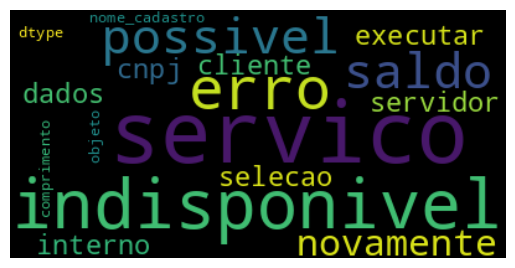

In [ ]:
#avaliação positiva
wc = WordCloud()
wc.generate(texto_limpo_pos)
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [ ]:
#avaliação negativa
dados_negativos = dados_atendimentos[dados_atendimentos['avaliacao'] == 'negativa']
texto_ajustado_neg = dados_negativos['erro'].str.lower()
texto_ajustado_neg = texto_ajustado_neg.str.replace(r"[^a-zA-Z\s]", "")
texto_ajustado_neg = texto_ajustado_neg.str.replace(r"\b\w{1,3}\b", "")
texto_ajustado_neg =str(texto_ajustado_neg)

<ipython-input-35-b9228e8e9263>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  texto_ajustado_neg = texto_ajustado_neg.str.replace(r"[^a-zA-Z\s]", "")
<ipython-input-35-b9228e8e9263>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  texto_ajustado_neg = texto_ajustado_neg.str.replace(r"\b\w{1,3}\b", "")


In [ ]:
#avaliação negativa
texto_limpo_neg = re.sub(r"[^a-zA-Z\s]|(?:\b\w{1,2}\b)|\n", "", texto_ajustado_neg)
texto_limpo_neg

'                  erro  validacao  dados complementares                                  internal server error                               cnpj cliente  cadastrado       momento este serivco esta indisponivel  favor                                    cliente  cadastrado                                                                            erro  validacao  dados basicos       possivel consultar  saldo tente novamente      momento este serivco esta indisponivel  favor                                  cliente  cadastrado                        encontrou dados para  selecaoName erro Length  dtype object'

In [ ]:
#avaliação negativa
def remove_stops_neg(texto_limpo_neg):
    stops = set(STOP_WORDS)
    palavras_limpas = []
    for palavra in texto_limpo_neg.split():
        if palavra.lower() not in stops:
            palavras_limpas.append(palavra)
    return ' '.join(palavras_limpas)

In [ ]:
#avaliação negativa
texto_limpo_neg = remove_stops_pos(texto_limpo_neg)
texto_limpo_neg = re.sub(r"[^a-zA-Z\s]|(?:\b\w{1,2}\b)|\n", "", texto_limpo_neg)
texto_limpo_neg = texto_limpo_neg.replace('serivco','servico')
texto_limpo_neg = texto_limpo_neg.replace('error', 'erro')
texto_limpo_neg = texto_limpo_neg.replace('Length', 'comprimento')
texto_limpo_neg = texto_limpo_neg.replace('server', 'servidor')
texto_limpo_neg = texto_limpo_neg.replace('object', 'objeto')
texto_limpo_neg = texto_limpo_neg.replace('internal', 'interno')
texto_limpo_neg = texto_limpo_neg.replace('cadastradoName', 'nome_cadastro')
texto_limpo_neg = re.sub(r'\b(?:ops|nao|tent|consultar|encontrou|selecaoName|este|requestcreditservice|tente|esta)\b', '', texto_limpo_neg)
texto_limpo_neg

'erro validacao dados complementares interno servidor erro cnpj cliente cadastrado servico indisponivel cliente cadastrado erro validacao dados basicos possivel  saldo novamente servico indisponivel cliente cadastrado  dados  erro comprimento dtype objeto'

(-0.5, 399.5, 199.5, -0.5)

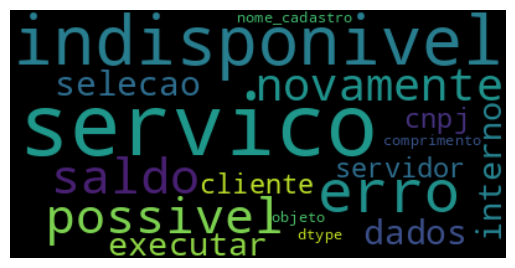

In [ ]:
#avaliação negativa
wc = WordCloud()
wc.generate(texto_limpo_pos)
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

10 – Na tabela do censo de 2010, obter o índice de Gini por UF (state) (criar um dataframe como
df_gini_estado).

In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = array.to_numpy()
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))


gini_estado = dados_renda.groupby('state')['RDPC'].apply(gini).reset_index()
gini_estado.columns = ['state', 'gini_coe']
print(gini_estado)

   state  gini_coe
0     AC  0.195495
1     AL  0.140823
2     AM  0.180262
3     AP  0.177035
4     BA  0.160275
5     CE  0.132551
6     DF  0.000000
7     ES  0.153020
8     GO  0.138104
9     MA  0.187907
10    MG  0.192143
11    MS  0.134532
12    MT  0.154616
13    PA  0.208619
14    PB  0.134084
15    PE  0.169153
16    PI  0.149203
17    PR  0.131235
18    RJ  0.146672
19    RN  0.144012
20    RO  0.127922
21    RR  0.241690
22    RS  0.153786
23    SC  0.137464
24    SE  0.140378
25    SP  0.140590
26    TO  0.173719


11 – Realizar o join das tabelas de atendimento e df_gini_estado.

In [ ]:
atendimento_gini = pd.merge(dados_atendimentos, gini_estado, on='state', how='inner')
atendimento_gini.head(5)

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,gini_coe
0,1,CE,online,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.132551
1,3,CE,offline,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR""",0.132551
2,25,CE,offline,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 18:00,165,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",0.132551
3,74,CE,offline,100%,0,n/ avaliado,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,155,500,"""ERRO AO EXECUTAR SERVICO: REQUESTCREDITSERVICE""",0.132551
4,99,CE,offline,60%,2,n/ avaliado,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 17:59,212,550,"""NAO ENCONTROU DADOS PARA A SELECAO""",0.132551


12 – Obter as medidas descritivas em relação ao índice de gini por tipo de avaliação (colunas:
indice_gini e avaliacao). Esta análise é importante para conhecer se o banco realiza melhor
atendimento em estados de maior diferença social. Pode ser um problema para a imagem do
banco

In [ ]:
meddesc_avaliacaogini = atendimento_gini.groupby('avaliacao')['gini_coe'].describe()
meddesc_avaliacaogini

,count,mean,std,min,25%,50%,75%,max
avaliacao,,,,,,,,
n/ avaliado,239.0,0.156475,0.024968,0.127922,0.138104,0.149203,0.173719,0.24169
negativa,510.0,0.158849,0.027977,0.127922,0.138104,0.149203,0.177035,0.24169
positiva,251.0,0.158473,0.027496,0.127922,0.138104,0.149203,0.173719,0.24169


In [ ]:
contagem_avaliacoes_por_estado = atendimento_gini.groupby(['state', 'avaliacao']).size().reset_index(name='contagem')
contagem_avaliacoes_por_estado_pivot = contagem_avaliacoes_por_estado.pivot(index='state', columns='avaliacao', values='contagem').reset_index()
gini_avaliacao = pd.merge(contagem_avaliacoes_por_estado_pivot, gini_estado, on='state', how='left')
gini_aval_ord = gini_avaliacao.sort_values(by='gini_coe', ascending=False)
print(gini_aval_ord)

   state  n/ avaliado  negativa  positiva  gini_coe
20    RR            5        22        10  0.241690
12    PA            9        19         9  0.208619
0     AC            5        20        11  0.195495
9     MG           12        15         5  0.192143
8     MA            8        14         9  0.187907
2     AM            8        19         8  0.180262
3     AP            6        25        10  0.177035
25    TO            8        17         9  0.173719
14    PE            8        15         9  0.169153
4     BA           12        24        13  0.160275
11    MT           10        20        12  0.154616
21    RS            8        16        10  0.153786
6     ES           14        20         8  0.153020
15    PI            9        22        11  0.149203
17    RJ            8        21         9  0.146672
18    RN           13        17         7  0.144012
1     AL            9        20        10  0.140823
24    SP           14        23        10  0.140590
23    SE    

In [ ]:
#correlação
correlacao = gini_aval_ord.corr()
correlacao

<ipython-input-44-4265f3c8df5d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = gini_aval_ord.corr()


,n/ avaliado,negativa,positiva,gini_coe
n/ avaliado,1.000000,0.066139,-0.349359,-0.392516
negativa,0.066139,1.000000,0.175496,-0.129010
positiva,-0.349359,0.175496,1.000000,-0.173311
gini_coe,-0.392516,-0.129010,-0.173311,1.000000


13 – Escreva um breve resumo das suas análises demonstrando os pontos mais relevantes.

Resposta:
* Os valores de Gini variam de 0 a 0,24.
* Distríto Federal tem o menor valor: 0 o que significa que a renda é destribuída igualmente ou é alguma aberração dos dados. Em seguida, Rondonia com 0,12 o que consideramos a renda melhor destribuída no Brasil.
* Os piores indices de Gini encontram-se em Roraíma e Pará (0,24 e 0,20, respectivamente) o que sugere uma maior desigualdade na distribuição de renda.
* Roraíma possui um alto valor de avaliações negativas (22) e um coeficiente de Gini alto também (0.24), porém Rondonia possui um numero ainda maior de avaliações negativas (24) mesmo sendo o melhor coeficiente de Gini do Brasil(0,12). Bahia, Sergipe e Pernambuco tem os maiores numeros de avaliações positivas (13), mas se encontram em lugares variados na "fila". Estes fatos nos sugerem que não há relação entre avaliações e coeficiente de Gini, descartando assim a hipotese que este o banco realiza melhor atendimento em estados de maior diferença social.
* A correlação entre Gini e outras variáveis tem uma relação negativa, mas não muito forte (-0,39 a -0,12, valores não muito próximos de -1). Há a hipótese de que quando a medida que uma variável suba, a outra diminua.